# Import Python Libraries:

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Importing the input files


In [323]:
file_path="/Users/apple/Downloads/loandf.csv"

df = pd.read_csv(file_path, low_memory=False)

# Plotting functions

In [324]:
def visualize_loan_status_univariable(df, x_column):
    y_column='loan_status'
    title="Loan Status by " + str(y_column)
    cross_tab = pd.crosstab(df[x_column], df[y_column], normalize='index') * 100
    
    # Plotting
    plt.figure(figsize=(12, 8))
    ax = cross_tab.plot(kind='bar', stacked=True)
    plt.xlabel(x_column)
    plt.ylabel('Percentage')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Loan Status')

    # Annotate percentages on the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

    plt.tight_layout()
    plt.savefig(x_column)
    plt.show()


def visualize_loan_status_bivariate(df, x_column):
    """
    Visualize loan status distribution by employee length.

    Parameters:
    - df: DataFrame containing the required columns.
    - x_column: Name of the column representing employee length.
    - y_column: Name of the column representing loan status.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    - title: Title of the plot.

    Returns:
    - None
    """
    title='Loan Status by ' + x_column
    y_column='loan_status'
    cross_tab = pd.crosstab(df[x_column], df[y_column])
    plt.figure(figsize=(12, 8))
    cross_tab.plot(kind='bar', stacked=True)

    plt.xlabel(x_column)
    plt.ylabel('count')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Loan Status')
    plt.tight_layout()
    plt.savefig(x_column)
    plt.show()

# Understand Data Frame

In [325]:
# Checking the numeric variables of the dataframes
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Data Cleaning & Manipulation

## Dropping columns that has only single values and columns that wont be usefull for analyzing

In [326]:
df.drop(['grade', 'sub_grade','id','pymnt_plan', 'member_id','collections_12_mths_ex_med','emp_title'
         ,'policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt',
        'tax_liens','url','desc','funded_amnt_inv'],axis=1,inplace=True)

## Tried and tested date columns and other columns, Since Evident inference could not be obtained from these columns, dropping these columns

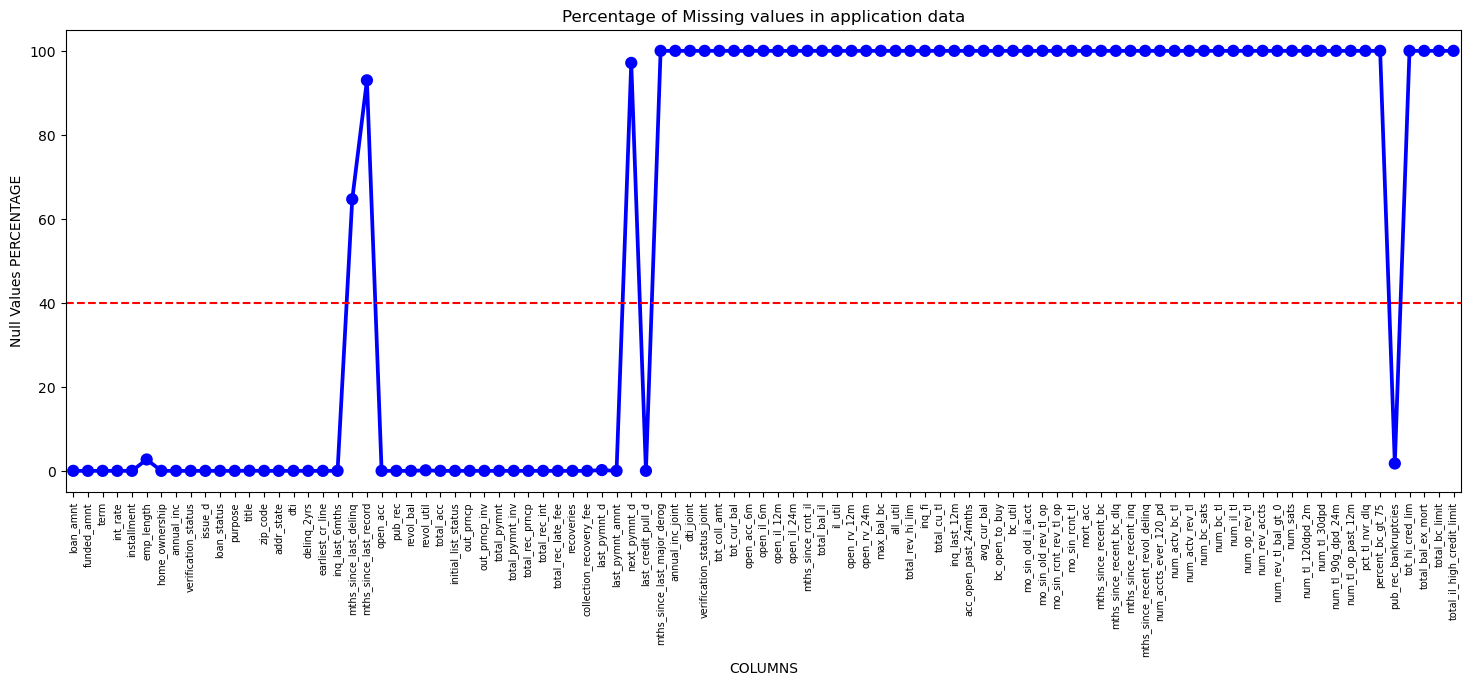

In [327]:
null_applicationDF = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

## Remove null values

In [328]:
nan_counts = df.isnull().sum()

# Select columns with fewer than 3000 NaN values
selected_columns = nan_counts[nan_counts < 25000].index

df = df[selected_columns]

# #filtered dataframe
# df = df[df['loan_status'] != 'Current']

#Write to local
# df.to_csv('/Users/apple/Downloads/cleaned_loan.csv')

# Null check again

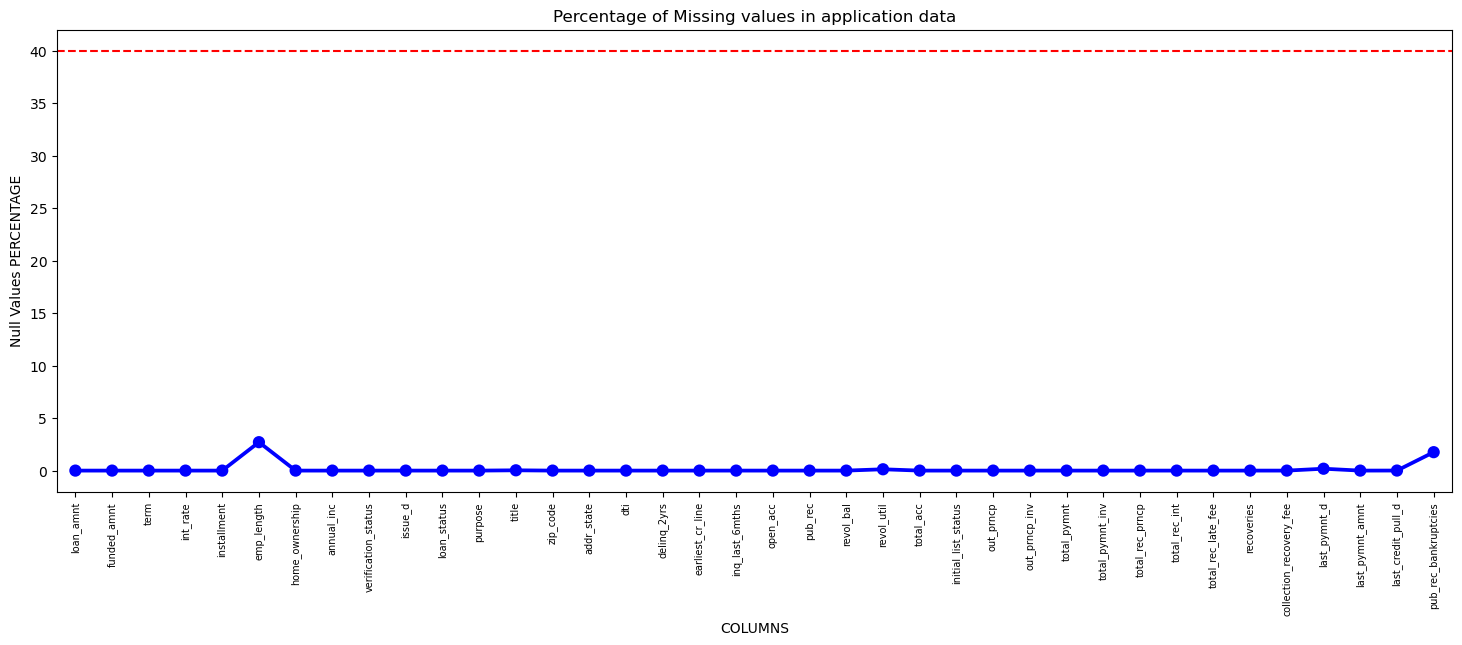

In [329]:
null_applicationDF = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

## Imbalance Data

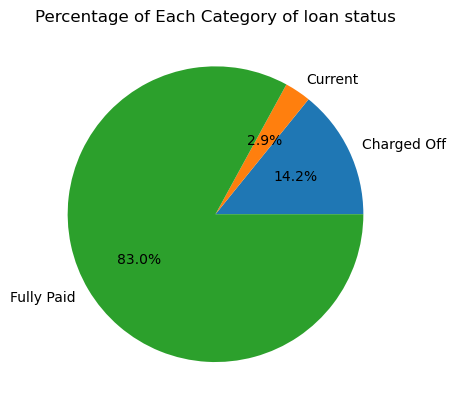

In [330]:
loan_status=df.groupby('loan_status').size()
loan_status
plt.pie(loan_status.values, labels=loan_status.index, autopct="%1.1f%%")
plt.title("Percentage of Each Category of loan status")
# plt.savefig("loan_status")
plt.show()


# Remove duplicates

In [331]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(39717, 38)
(39717, 38)


# No duplicates removed

# Remove outlier

In [332]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]
    return df_no_outliers

print(df.shape)

# Remove outliers from numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df_no_outliers_iqr = remove_outliers_iqr(df[numeric_cols])

outlier_indices = df.index.isin(df_no_outliers_iqr.index)
df = df[outlier_indices]

print(df.shape)

(39717, 38)
(38674, 38)


# setting high quartile values removes most values data ,so setting outliers very small value

# correlation checks on quantitative columns

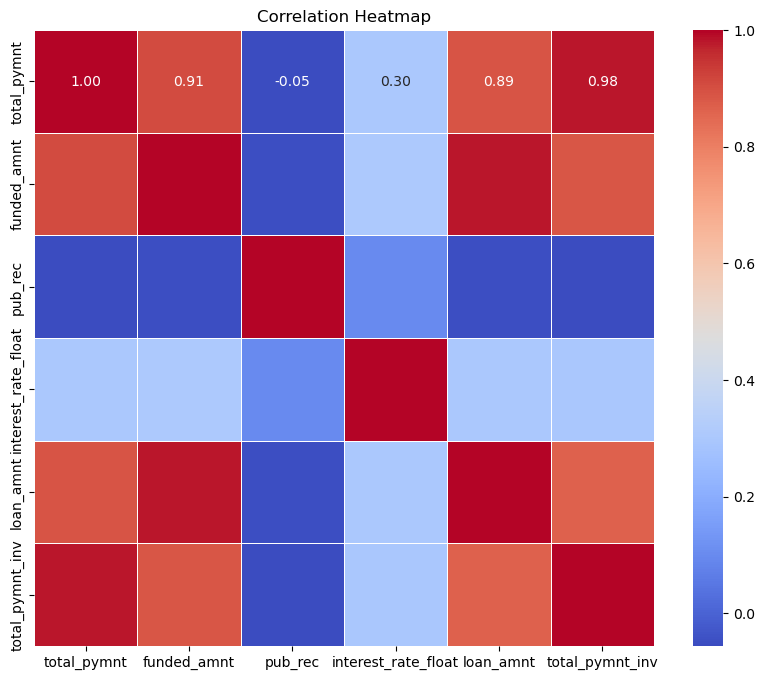

In [333]:
df['interest_rate_float'] = df['int_rate'].str.rstrip('%').astype('float')
subset_df = df[['total_pymnt', 'funded_amnt', 'pub_rec','interest_rate_float','loan_amnt','total_pymnt_inv']]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Inference:
### We can conclude that the 'total_pymnt' and 'total_pymnt_inv', then 'loan_amnt' and 'funded_amnt'  are highly correlated

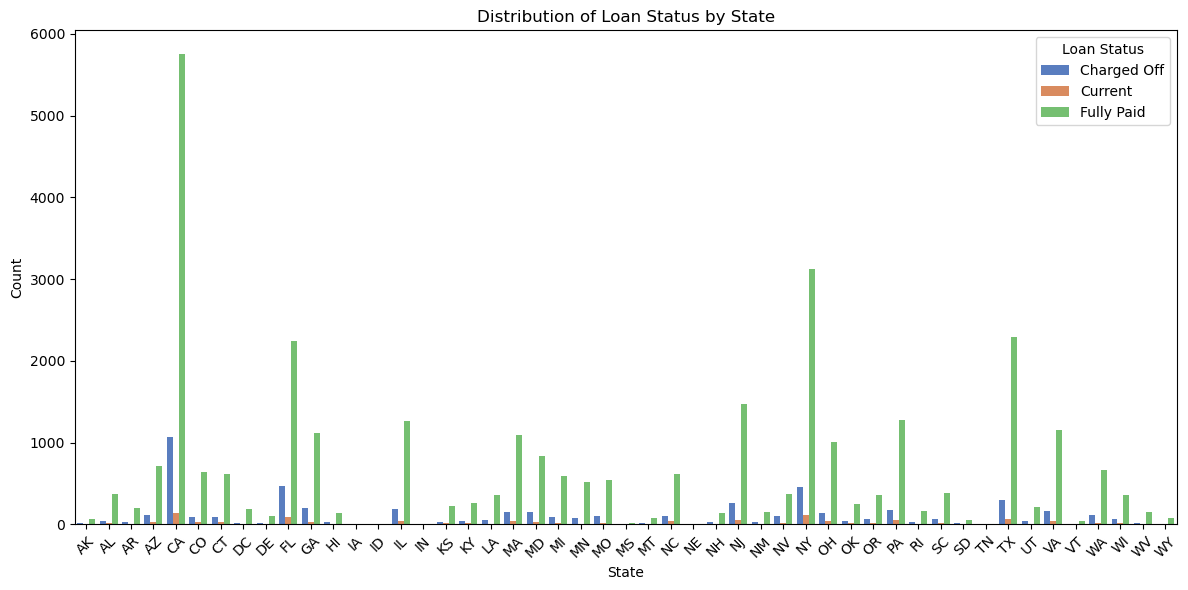

In [334]:
categorized_counts = df.groupby(['addr_state', 'loan_status']).size().reset_index(name='count')
# categorized_counts


plt.figure(figsize=(12, 6))
sns.barplot(data=categorized_counts, x='addr_state', y='count', hue='loan_status', palette='muted')
plt.title('Distribution of Loan Status by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

# Checking the number of unique values each column possess to identify categorical columns

In [335]:
cat_columns = df.nunique().sort_values().loc[(df.nunique() > 1) & (df.nunique() < 15)].index.tolist()
print(cat_columns)

['term', 'verification_status', 'pub_rec_bankruptcies', 'pub_rec', 'loan_status', 'home_ownership', 'delinq_2yrs', 'inq_last_6mths', 'emp_length', 'purpose']


# Inference:
## Ordered - Term,emp_length,pub_rec,pub_rec_bankruptcies,
## Unordered - Purpose,home_ownership,loan_status,verification_status

# Converting interest rate column to quartiles for analyzing / Derived metrics

In [336]:
df['int_rate_float'] = df['int_rate'].str.rstrip('%').astype('float')

#finding quartiles
q1 = df['int_rate_float'].quantile(0.25)  # 1st quartile (25th percentile)
q2 = df['int_rate_float'].quantile(0.50)  # 2nd quartile (median)
q3 = df['int_rate_float'].quantile(0.75)  # 3rd quartile (75th percentile)


def assign_quartile(row):
  if row['int_rate_float'] <= q1:
    return 1
  elif (row['int_rate_float'] <= q2) & (row['int_rate_float'] >= q1):
    return 2
  elif (row['int_rate_float'] <= q3) & (row['int_rate_float'] >= q2):
    return 3
  elif row['int_rate_float'] >= q3:
    return 4

# Apply the function to create the 'Loan_quartile' column
df['Loan_quartile'] = df.apply(assign_quartile, axis=1)
df.drop('int_rate',axis=1,inplace=True)

# Segmented dataframe

In [337]:
charged_off=df[df["loan_status"]=="Charged Off"]#5627
fully_paid=df[df["loan_status"]=="Fully Paid"]#32950
home_ownership_own=df[df["home_ownership"]=="OWN"]#3058

# Analyzing data from here.......

# Univariate Analysis

<Figure size 1200x800 with 0 Axes>

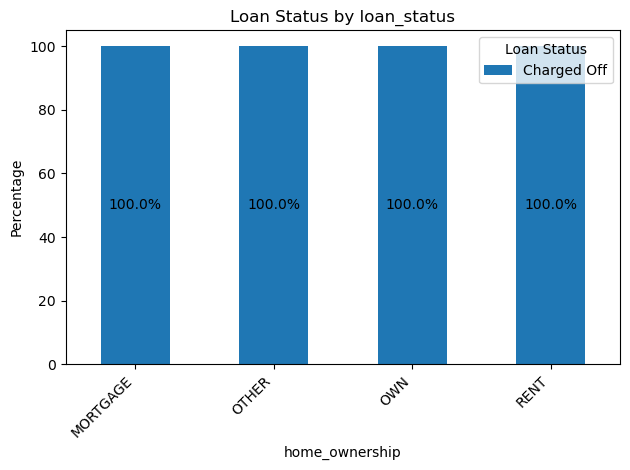

In [338]:
visualize_loan_status_univariable(charged_off, 'home_ownership')
#people who take loans most reside in rent house`
##################We can conclude that Own house borrowers mostly pay their loans,we can strongly provide loan to own house borrowers

<Figure size 1200x800 with 0 Axes>

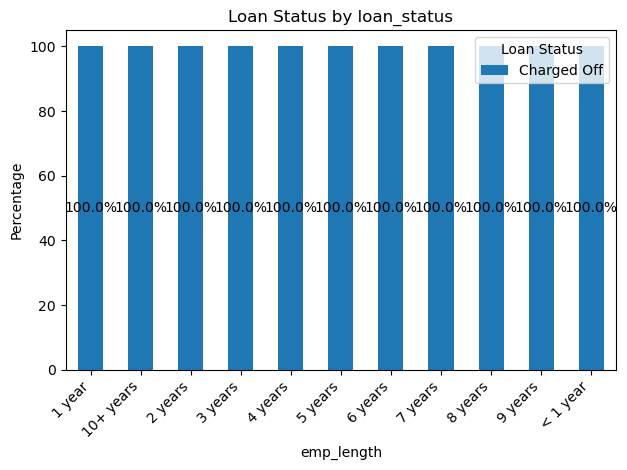

In [339]:
visualize_loan_status_univariable(charged_off, 'emp_length')
###################people who are employed less than 1 year are more prone to be defaulters.And as the Emp length increases the charge off rate decreases

# Inference:
## People who are employed less than 1 year are more prone to be defaulters.
## As the Emp length increases the charge off rate decreases

<Figure size 1200x800 with 0 Axes>

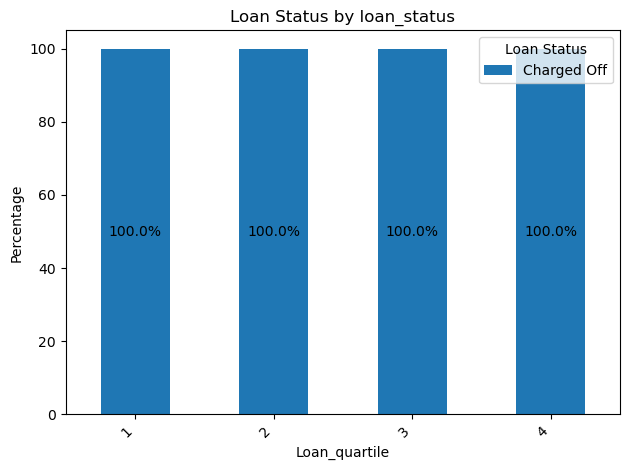

In [340]:
visualize_loan_status_univariable(charged_off, 'Loan_quartile')

# Inference:
## Borrowers used to charge off when Interest rate is higher

<Figure size 1200x800 with 0 Axes>

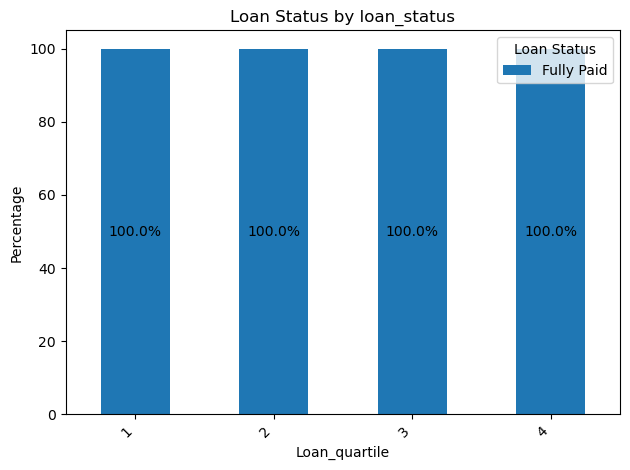

In [341]:
visualize_loan_status_univariable(fully_paid, 'Loan_quartile')

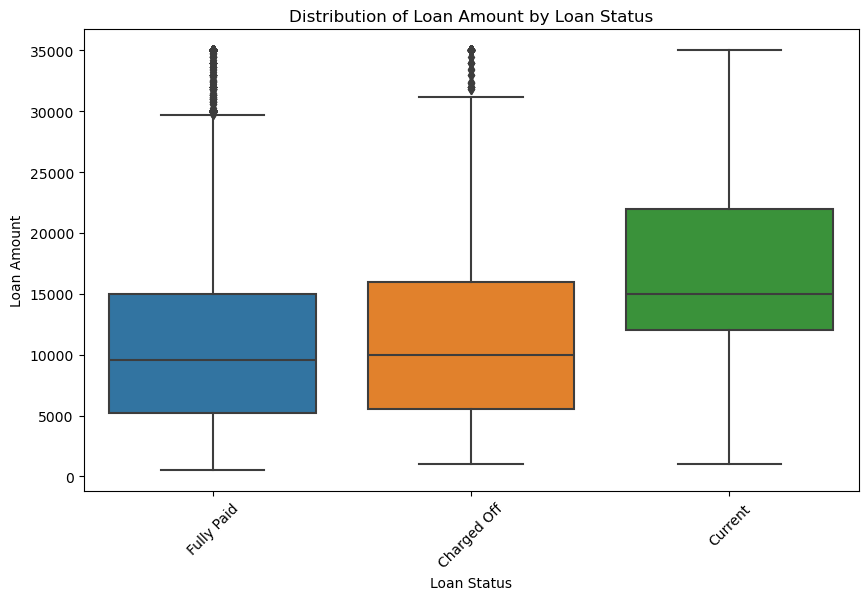

In [342]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount by Loan Status')
plt.xticks(rotation=45)
plt.show()

# Inference:
## irrespective of the loan amount, the loan defaulters are present

# Bivariate Analysis

<Figure size 1200x800 with 0 Axes>

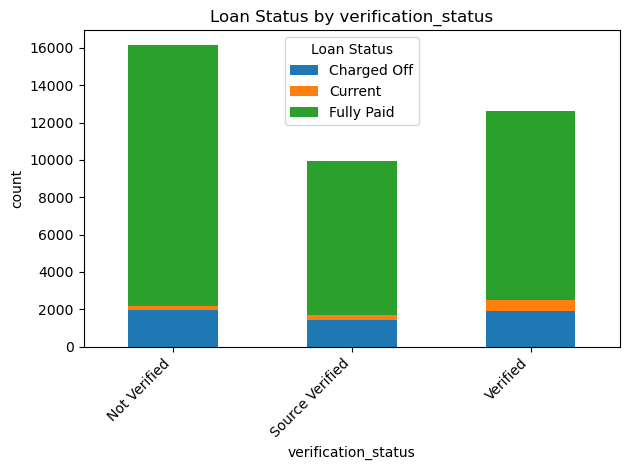

In [343]:
visualize_loan_status_bivariate(df, 'verification_status')

<Figure size 1200x800 with 0 Axes>

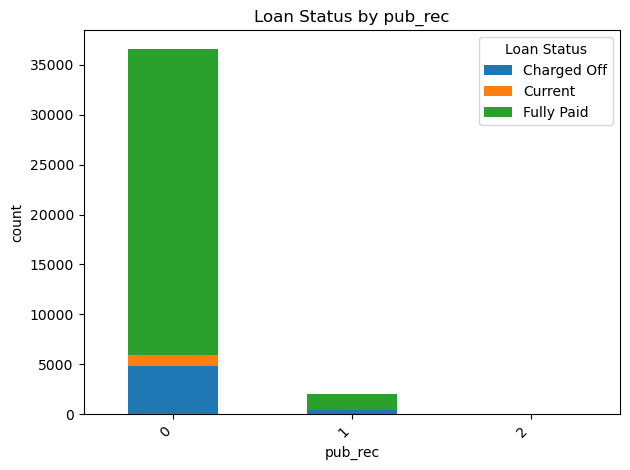

In [344]:
visualize_loan_status_bivariate(df, 'pub_rec')

# Inference:
## The pub_rec of 1,2 and 3 have more defaulters and zero defaulters in 3 and 4

<Figure size 1200x800 with 0 Axes>

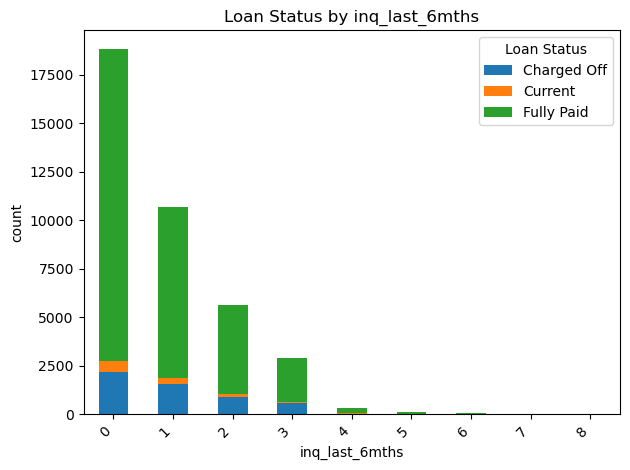

In [345]:
visualize_loan_status_bivariate(df, 'inq_last_6mths')

# Inference
## The observed variation in trends may be because of trhe below reasons
## Seasonal Variations,
## Interest Rate Changes,
## Marketing or Promotional Activities
## Financial Planning or Budgeting 

<Figure size 1200x800 with 0 Axes>

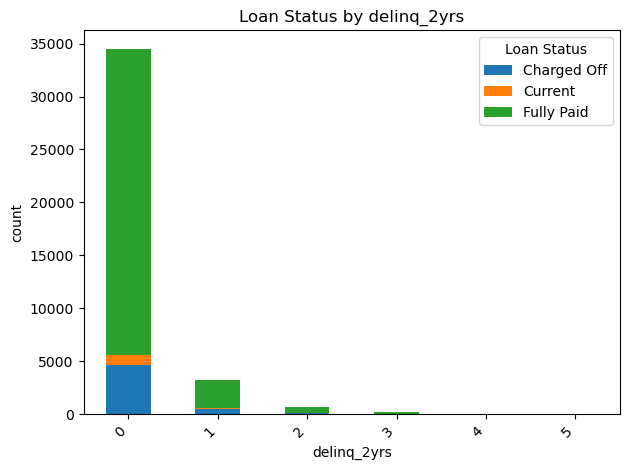

In [346]:
visualize_loan_status_bivariate(df, 'delinq_2yrs')

<Figure size 1200x800 with 0 Axes>

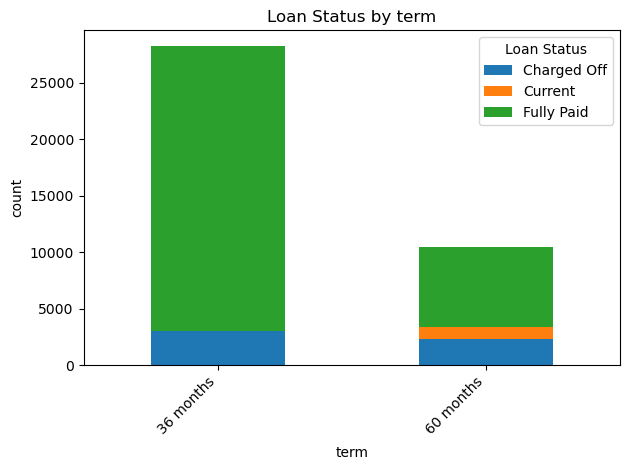

In [347]:
visualize_loan_status_bivariate(df, 'term')

# Inference:
## The longer the term, more the defaulters

<Figure size 1200x800 with 0 Axes>

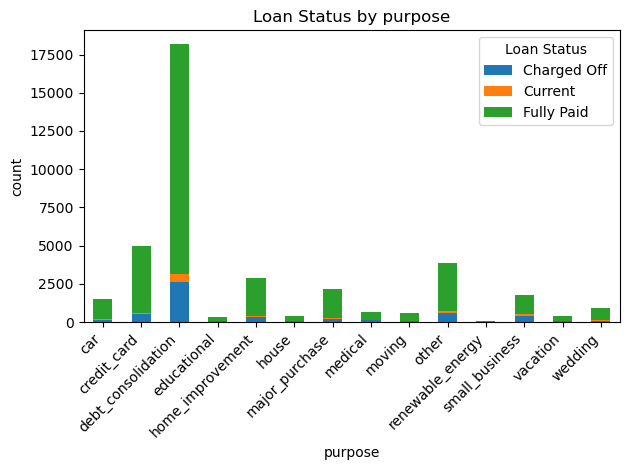

In [348]:
visualize_loan_status_bivariate(df, 'purpose')

## Inferences:
### The percentage of small business charge off is higher than other, 
### so its clear that its better to avoid borrowers who take loan for small_business

<Figure size 1200x800 with 0 Axes>

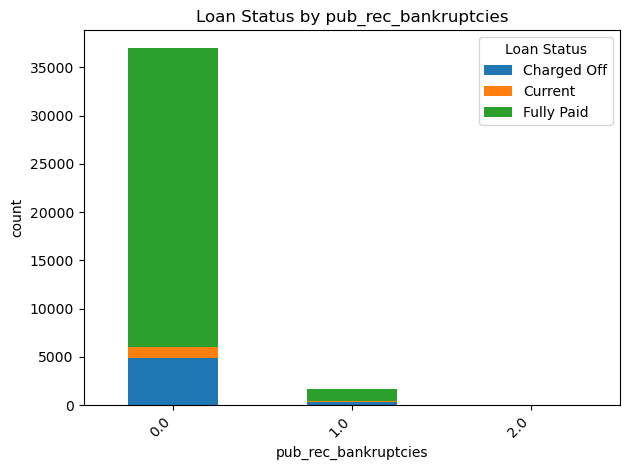

In [349]:
visualize_loan_status_bivariate(df, 'pub_rec_bankruptcies')

## Inferences:
### The higher the Public bankruptcies , the higher the charge offs.

#  Conclusions

- Approximately 15% of loans end in charge offs, indicating a notable proportion compared to those fully paid.
- Notably high correlations exist between 'total_pymnt' and 'total_pymnt_inv', as well as between 'loan_amnt' and 'funded_amnt'.
- Individuals with less than one year of employment exhibit a higher likelihood of defaulting.
- There is a discernible trend of decreasing charge off rates with increasing employment length.
- Borrowers tend to default more frequently when faced with higher interest rates.
- Loan defaults are evident across various loan amounts, suggesting no dependency on loan size.
- Longer loan terms correlate with higher default rates.
- Small business loans exhibit a higher charge off percentage compared to other loan purposes, suggesting caution in lending to small business borrowers.
- The incidence of charge offs increases with higher public bankruptcies, highlighting a potential risk factor in lending decisions.
- The pub_rec of 1,2 and 3 have more defaulters and zero defaulters in 3 and 4